# Checking Correlation between variables - testing theories

## Estimating the correlation between two variables with a contingency table and a chi-squared test

Estimating correlation between total number of deaths and being a smoker (both female and male smokers).
Note that the exact same analysis could be done for other variables, for example: cardiovasc death rate and diabetes prevalence.

In [99]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)

df_indexed = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/aiHackCovid/datasets/owid-covid-data.csv", index_col='continent')

display(df_indexed.head(1))

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asia,AFG,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [88]:
# Select latest available data
df_indexed = df_indexed.loc[df_indexed['date'] == '2021-04-24']

countries = df_indexed['location']
total_deaths = df_indexed['total_deaths']

n_smokers = df_indexed['female_smokers'] + df_indexed['male_smokers']

In [95]:
df_bis_smoking = pd.DataFrame({'country':countries,
                       'total_deaths': total_deaths,
                       'n_smokers': n_smokers}).dropna()

df_bis_smoking = df_bis_smoking.reset_index(drop=True)

df_bis_smoking.set_index(["country"], inplace = True,
                    append = True, drop = True)

df_bis_smoking.head()

,,total_deaths,n_smokers
,country,,
0,Albania,2372.0,58.3
1,Algeria,3198.0,31.1
2,Andorra,124.0,66.8
3,Argentina,61474.0,43.9
4,Armenia,4001.0,53.6


## Pearson's correlation coefficient


In [90]:
# Measures linear correlation between two sets of data - the closest to 1 the higher the correlation.
df_bis_smoking.corr()

,total_deaths,n_smokers
total_deaths,1.000000,-0.005351
n_smokers,-0.005351,1.000000


This is a very low negative correlation between smoking and death from Covid-19.

# Contingency table yielding frequency

In [91]:
df_bis_smoking['total_deaths_binarized'] = (df_bis_smoking['total_deaths'] > df_bis_smoking['total_deaths'].median())
df_bis_smoking['n_smokers_binarized'] = (df_bis_smoking['n_smokers'] > df_bis_smoking['n_smokers'].median())

pd.crosstab(df_bis_smoking['total_deaths_binarized'], df_bis_smoking['n_smokers_binarized'])

n_smokers_binarized,False,True
total_deaths_binarized,,
False,48,22
True,23,46


## To determine if there is a statistically significant correlation between the variables -> chi-squared test

In [92]:
from IPython.display import display_html
import scipy.stats as st

this = pd.crosstab(df_bis_smoking['total_deaths_binarized'], df_bis_smoking['n_smokers_binarized'])
st.chi2_contingency(this)

(15.885715775900074,
 6.728463101347897e-05,
 1,
 array([[35.75539568, 34.24460432],
        [35.24460432, 33.75539568]]))

# Conclusion
The second value of the Chi-squared test is the p-value which indicates the likelihood of the null-hypothesis (in this case, that smoking is not correlated with the number of deaths). Since it's much lower than 0.05 we can reject the null - there is then a correlation between the proportion of deaths and smoking, or rather, the data shows this correlation as indicated by this test.

# Multivariate Linear Regression
Modelling the relationship between a dependent variable and one or more independent variables.

In [98]:
df_indexed = pd.read_csv(r"/home/goncalo/Documents/cover/Illuminatti/hackathon/aiHackCovid/datasets/owid-covid-data.csv", index_col='continent')

df_indexed = df_indexed.loc[df_indexed['date'] == '2021-04-24']

countries = df_indexed['location']
total_deaths = df_indexed['total_deaths']
diabetes = df_indexed['diabetes_prevalence']
cvd_rate = df_indexed['cardiovasc_death_rate']
n_smokers = df_indexed['female_smokers'] + df_indexed['male_smokers']

df_bis = pd.DataFrame({'country':countries,
                       'total_deaths': total_deaths,
                       'diabetes_prevalence': diabetes,
                       'cvd_rate': cvd_rate,
                       'n_smokers': n_smokers}).dropna()

df_bis = df_bis.reset_index(drop=True)

df_bis.set_index(["country"], inplace = True,
                    append = True, drop = True)

display(df_bis.head())

,,total_deaths,diabetes_prevalence,cvd_rate,n_smokers
,country,,,,
0,Albania,2372.0,10.08,304.195,58.3
1,Algeria,3198.0,6.73,278.364,31.1
2,Andorra,124.0,7.97,109.135,66.8
3,Argentina,61474.0,5.50,191.032,43.9
4,Armenia,4001.0,7.11,341.010,53.6


In [97]:
display(df_bis.describe())

# We can see below a short summary of the data, like the mean or the max value for each metric.

,total_deaths,diabetes_prevalence,cvd_rate,n_smokers
count,1.390000e+02,139.000000,139.000000,139.000000
mean,4.361565e+04,7.563597,253.587820,42.997619
std,2.692318e+05,3.867904,123.443482,18.779230
min,1.000000e+00,0.990000,79.370000,8.000000
25%,3.220000e+02,4.940000,153.500000,27.900000
50%,2.101000e+03,7.070000,237.372000,43.400000
75%,1.077300e+04,9.215000,322.356000,54.750000
max,3.099467e+06,22.020000,724.417000,91.900000


## (Multivariate) Linear regression assumption of linearity

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


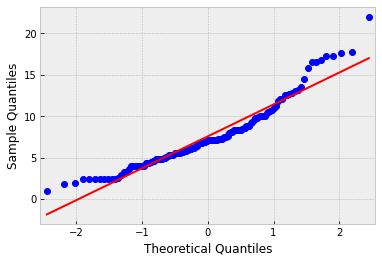

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


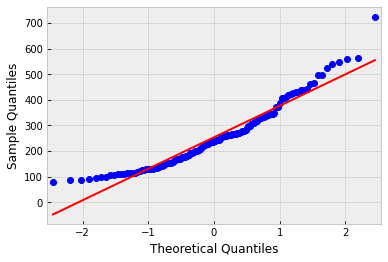

/home/goncalo/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


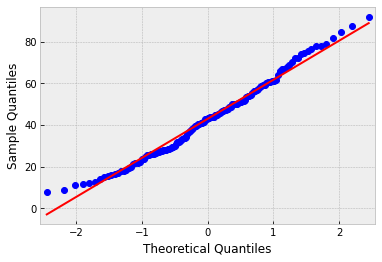

The data can be considered normally distributed.


In [84]:
'''
Verify normal distribution with, for example, a q-q plot, which
compares our data with a Gaussian distribution (or normal distribution)
'''
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df_bis['diabetes_prevalence'], line='s')
pyplot.show()

qqplot(df_bis['cvd_rate'], line='s')
pyplot.show()

qqplot(df_bis['n_smokers'], line='s')
pyplot.show()

print('The data can be considered normally distributed.')

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

y = np.log(df_bis['total_deaths'])
x = df_bis[['diabetes_prevalence', 'cvd_rate', 'n_smokers']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# define model
linear_regression = LinearRegression()

# fitting the model
linear_regression.fit(x_train,y_train)

print(linear_regression.intercept_)
print(linear_regression.coef_)

# predict with the data
y_pred = linear_regression.predict(x_test)

print()
print('Actual values:')
display(y_test)
print()
print('Predicted values:')
display(y_pred[0:8])

7.249826452738661
[-0.0086038  -0.00418358  0.03550622]

Actual values:


     country         
8    Bahamas              5.278115
90   Niger                5.252273
120  Tanzania             3.044522
109  Sierra Leone         4.369448
27   Comoros              4.983607
101  Qatar                6.035481
60   Italy               11.687055
96   Papua New Guinea     4.624973
113  South Africa        10.899051
121  Thailand             4.859812
26   Colombia            11.168828
89   New Zealand          3.258097
24   Chile               10.155879
110  Singapore            3.401197
91   Nigeria              7.630947
59   Israel               8.756210
135  World               14.946741
51   Greece               9.205328
119  Switzerland          9.268043
106  Senegal              7.002156
33   Czechia             10.272289
22   Canada              10.082136
2    Andorra              4.820282
118  Sweden               9.541297
62   Japan                9.199279
18   Brunei               1.098612
10   Bangladesh           9.301277
54   Iceland              3.36729


Predicted values:


array([6.98377864, 6.78224194, 7.35649992, 7.64518769, 7.04771492,
       7.35201756, 8.42542025, 7.31601519])

<AxesSubplot:xlabel='total_deaths'>

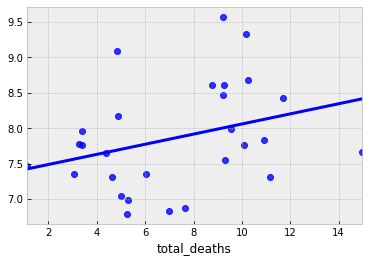

In [86]:
import seaborn as sb

sb.regplot(x=y_test, y=y_pred, ci=None, color="b")

We get an anedoctal result - the line shows underfitting. Still, the claim can be made, that based on this model and the data, there is a positive influence of the three variables in the total number of Covid-19 caused deaths worldwide, that is, cardiovasculary disease, diabetes and smoking.